# Get Data

Etter å hatt fått alt dataen jeg vil analysere, åpner jeg filen og leser av for data. Dataen er omgjort til en liste.

In [89]:
from datetime import datetime
import matplotlib.pyplot as plt
import csv


file1 = "AAPL_max.csv"

with open(file1, encoding="utf-8-sig") as fil1:
    reader = csv.reader(fil1)
    next(reader) # Går forbi første linje
    data = list(reader)

## Få data

Jeg lager en liste med datoer og hvor mye aksjen kostet på det tidspunktet. I loopen skipper jeg første to linjene some er bare header row og ticker row, omgjør datoen til en tid og så finner prisen den dagen.

## Plot grafen

Lager en figur med visse størrelser, ploter dato og priser op mot hverandre, x aksen har tid, y aksen har prisen. Tittel er bare priser over tid, har bare en graf så legend er unødvendig. Lager en Grid for lesbarhet og viser grafen.

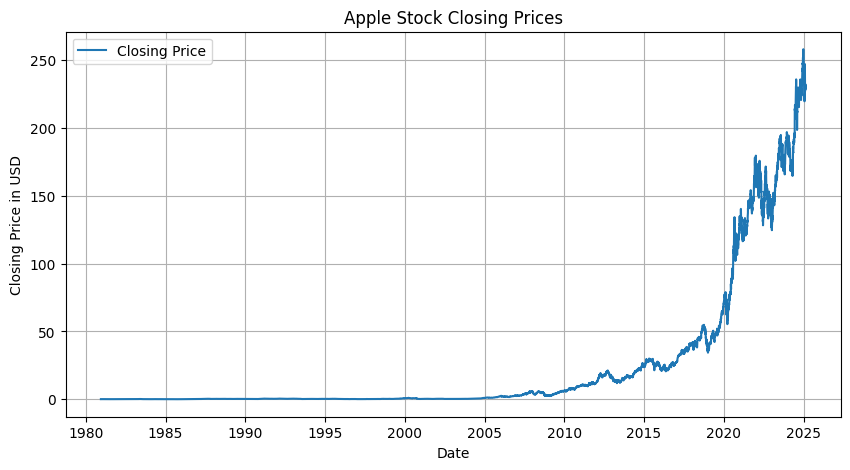

In [90]:
dates = []
closing_prices = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Volatility graf

Volatility, eller "implied volatility" er et mål på hvor sannsynlig det er at en aksje sin pris vil endre. Større Volatility vil si at det er større svingninger i grafen. Ofte vil ustabile aksjer ha høy volatility, det kan gå rett opp, og rett ned. Et kjent og nytt eksempel på en "Volatile" aksje er Gamestop, sett under:

![GME](https://s.yimg.com/ny/api/res/1.2/NbcO3douQEHy.7fCWtzCpA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTU0MjtjZj13ZWJw/https://media.zenfs.com/en/tipranks_452/b1f96579db9395fa224098176188688d)

Skikkelig store svingninger, både posetivt og negativt. Vi kan se for mye en aksje endrer sin pris ved å se på endring i prisen over en dag. Store endringer hver dag, tyder på at aksjen har høy volatility og er ikke sikker. Vi bruker ATR (Average True Range), som er målet på daglige pris bevegelser, inkludert gap. 

## ATR graf

Tar endring i åpningsprisen og sluttspris hver dag og plotter det, viser volatility.

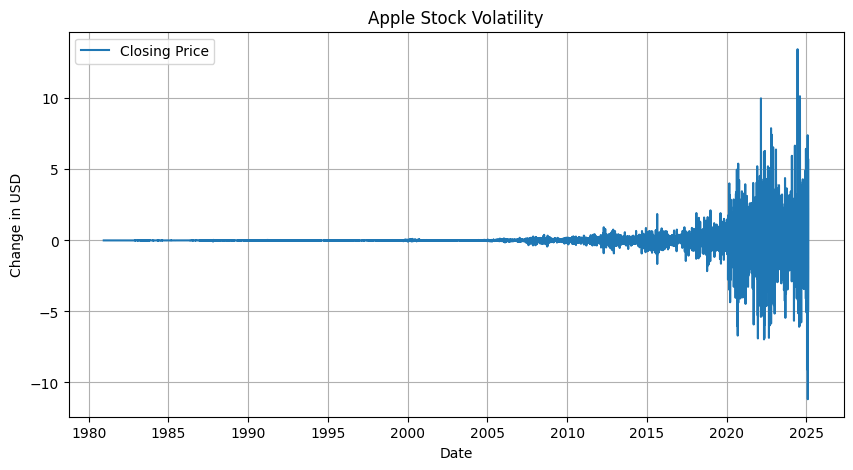

In [91]:
dates = []
volatility = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

## Problemer med grafene

1. Det største problemet er lesbarheten, dette fikses ved å se nærmere på grafen, som jeg løser videre nedover.
2. Andre problemet er at uteliggere bemerkes veldig lett.
3. En annen utfordring er at grafen kan bli for overfylt og vanskelig å tolke når alle datapunkter vises samtidig. Det kan være vanskelig å identifisere trender og mønstre i dataene på grunn av støy fra mange datapunkter. Dette er hvorfor det er viktig å se nærmere på data.


## 1980-2003

Bare endrer indekseringen til grafen for å se nærmere.

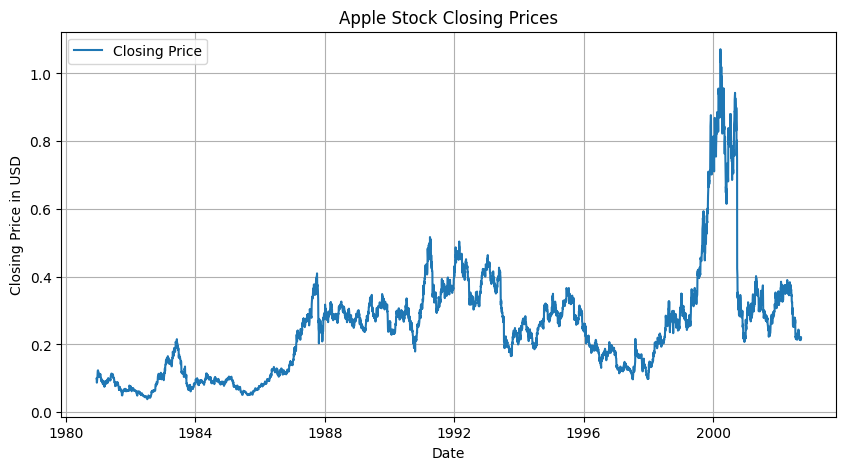

In [92]:
dates = []
closing_prices = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Dot-com bubble

Denne grafen viser starten av Apple som firma, og hvordan de skjøt opp med den såkalte "Dot-com bubble" og falt ned når det kresjet. En "Bubble" er når folk investerer i et produkt mer enn den er verdt, går opp og opp til folk merker at aksjeprisen er mye høyere enn den reelle verdien. Da "popper" boblen, og aksjeprisen faller tilbake til forsvarlig aksjepris. Dot-com boblen påvirket i hovedsak teknologiaksjer, som Apple er. Videre ser vi på Svingningene til grafen.

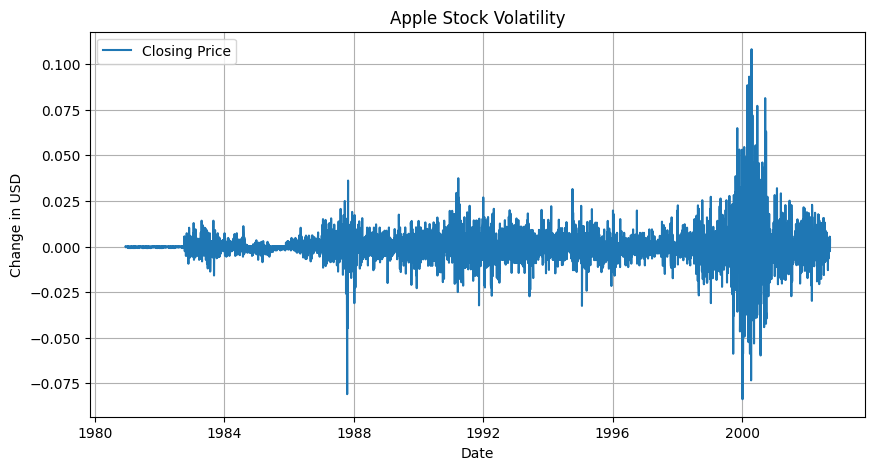

In [93]:
dates = []
volatility = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

## Volatility rundt Dot-com boblen

Vi ser svingningene før Dot-com boblen var rundt 10% fra top til bunn, men på toppen av Dot-com boblen, når aksjer var verdt mye mer enn de reelt burde være verdt var det nærmere 20% fra top til bunn. Når aksjer har så store svingninger er det veldig usikker det som kommer å skje videre, om man kan tjene på det eller alt går i do.

## 1999 - 2011

Ser videre på aksjeprisene ved å ta en annen del av listen å se nærmere på det. Prøve å inkludere både finanskrisen i 2008 og Dot-com boblen i 2001

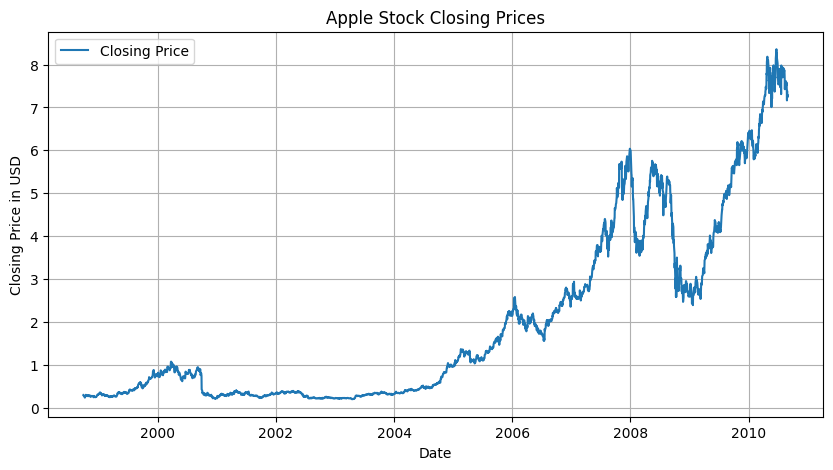

In [94]:
dates = []
closing_prices = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Volatility sammenlikning og finanskrisen



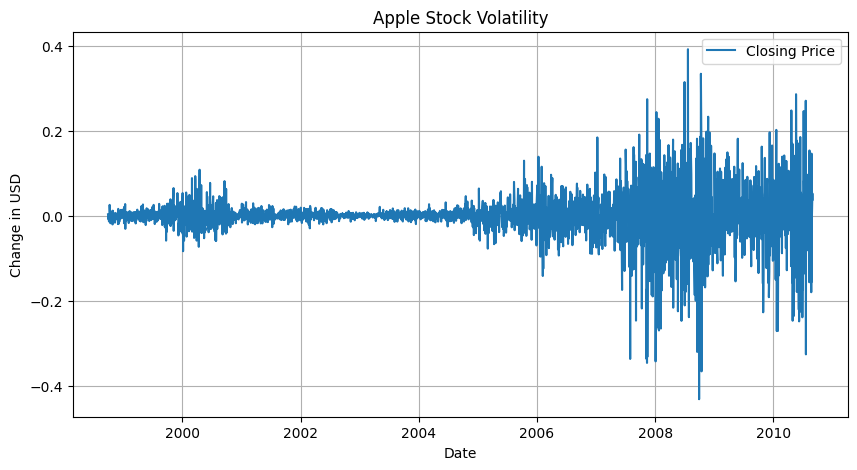

In [95]:
dates = []
volatility = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

## 2011 - Nå

Tar med siste bit av data, som viser hvor enormt stor Apple har blitt, rundt tretti ganger så stor.

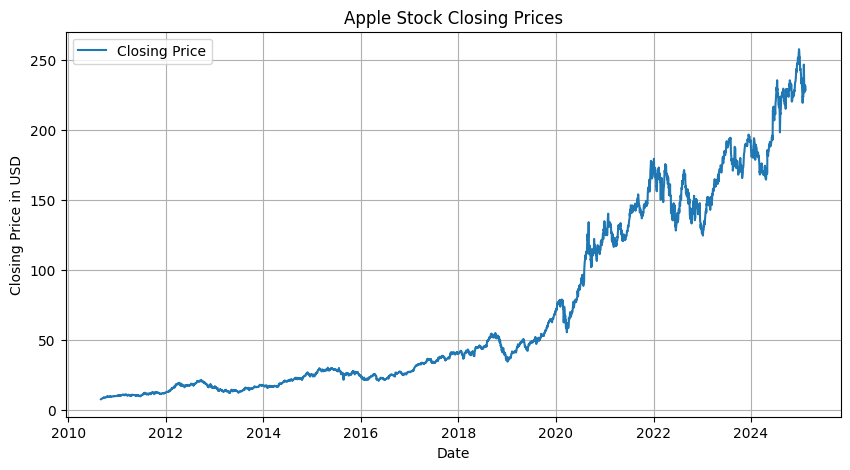

In [96]:
dates = []
closing_prices = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Nåtidens Volatility, er vi i boble?

Det er veldig store svingninger igjen idag, tyder dette på en til krise?

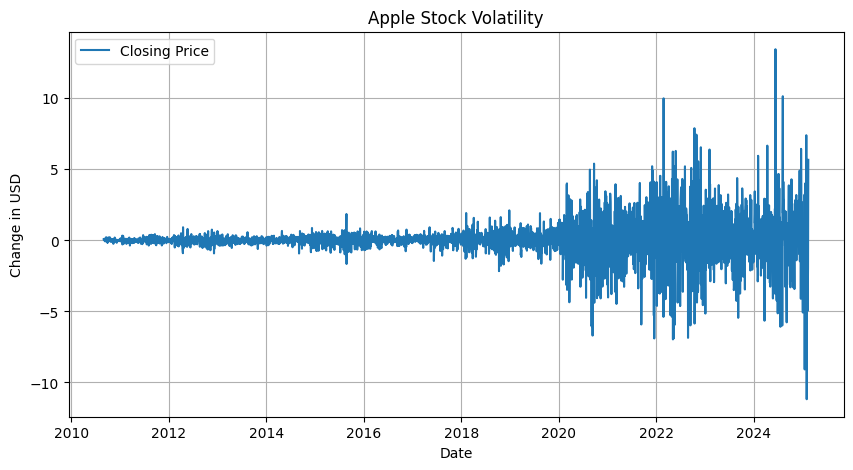

In [97]:
dates = []
volatility = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

# S&P 500

Ser på hvordan Apple har utviklet seg sammenliknet med det generelle markedet

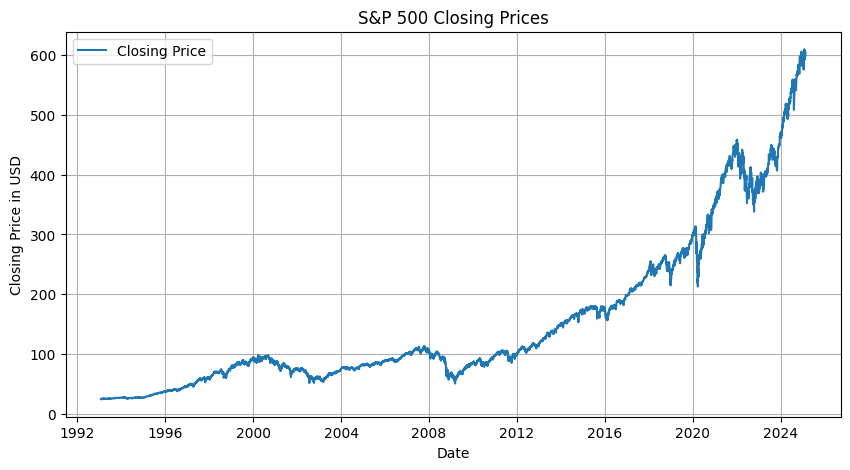

In [98]:
file2 = "S&P 500.csv"

with open(file2, encoding="utf-8-sig") as fil2:
    reader = csv.reader(fil2)
    next(reader) # Går forbi første linje
    spy_data = list(reader)


spy_dates = []
spy_closing_prices = []

for row in spy_data[2:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(spy_dates, spy_closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('S&P 500 Closing Prices')
plt.legend()
plt.grid()
plt.show()

## 2014 - Nå

I samme tid Apple har grodd åtti ganger så stor har markedet bare gått opp seks ganger. Jeg sier "bare" I virkeligheten er det noe av det raskeste endringene prosentvis vi har sett på markedet, og det ser ut til å ha fulgt en lineær trend.

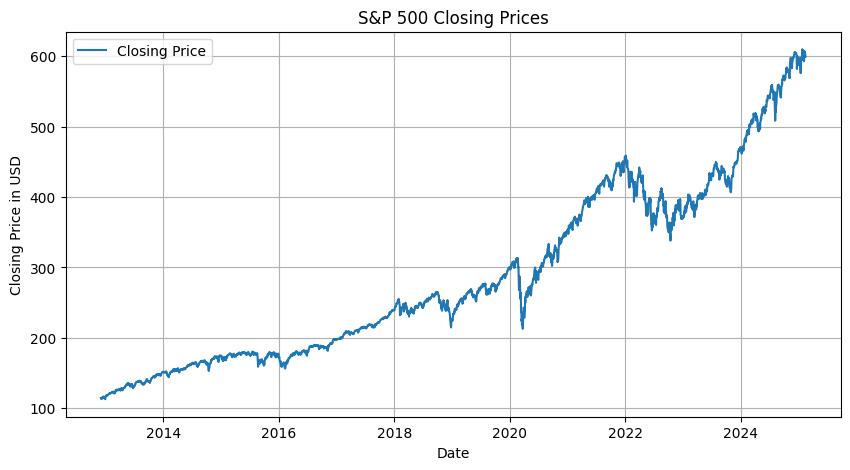

In [99]:
spy_dates = []
spy_closing_prices = []

for row in spy_data[5000:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(spy_dates, spy_closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('S&P 500 Closing Prices')
plt.legend()
plt.grid()
plt.show()

## S&P 500 Volatility

Mye mindre svingninger prosentvis, tyder på at det er tryggere å investere, men usansynlig å skyte opp slik Apple har gjort de siste årene.

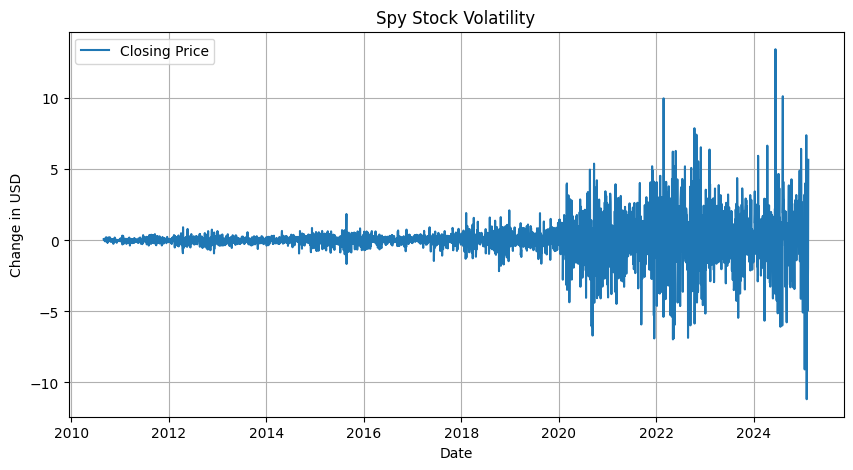

In [100]:
spy_volatility = []
spy_dates = []

for row in data[7500:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    change = float(row[1])-float(row[4])
    spy_volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(spy_dates, spy_volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Spy Stock Volatility')
plt.legend()
plt.grid()
plt.show()